# SLASH MARK:  Data Science Internship

## Basic Project Task 1 : Analyze Daily Weather Data

Project Description:

Use a small dataset of daily weather information (temperature, precipitation, etc.). The analysis is performed on the 'weather.csv' dataset. Ensure that this CSV file is in the same directory as the Python script or provide the correct file path in the code.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Step 1: Load the Data

In [37]:
df = pd.read_csv('weather.csv')
print("Data Loaded Successfully.")
df

Data Loaded Successfully.


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


#### Step 2: Data Exploration: Display information about the dataset

In [12]:
print("\nData Exploration:")
df.info()


Data Exploration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    floa

In [13]:
print("\nDataset Description:")
df.describe()


Dataset Description:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [14]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


#### Step 3: Create pair plots to visualize relationships between numeric variables


Data Visualization: Pair Plots


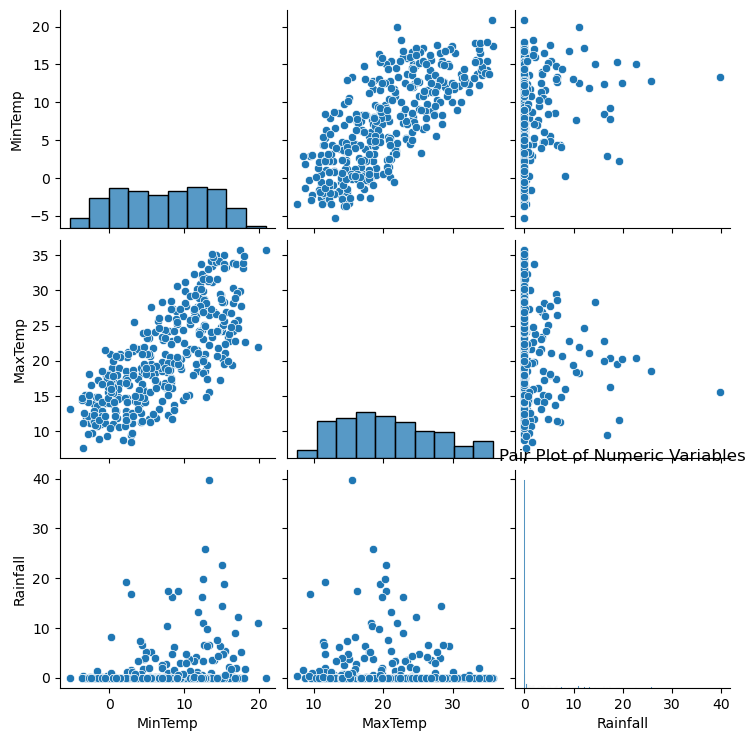

In [15]:
print("\nData Visualization: Pair Plots")
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.title("Pair Plot of Numeric Variables")
plt.show()

#### Step 4: Feature Engineering (if needed): Create a new feature for Temperature Range (MaxTemp - MinTemp)

In [19]:
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
print("\nFeature Engineering Complete: Added 'TempRange'.")



Feature Engineering Complete: Added 'TempRange'.


#### Step 5:Data Analysis: Calculate overall averages for MaxTemp and Rainfall

In [20]:
avg_max_temp = df['MaxTemp'].mean()
avg_rainfall = df['Rainfall'].mean()
print(f"\nAverage Max Temperature: {avg_max_temp:.2f}°C")
print(f"Average Rainfall: {avg_rainfall:.2f} mm")



Average Max Temperature: 20.55°C
Average Rainfall: 1.43 mm


#### Step 6: Data Visualization: Overall Averages


Data Visualization: Overall Averages


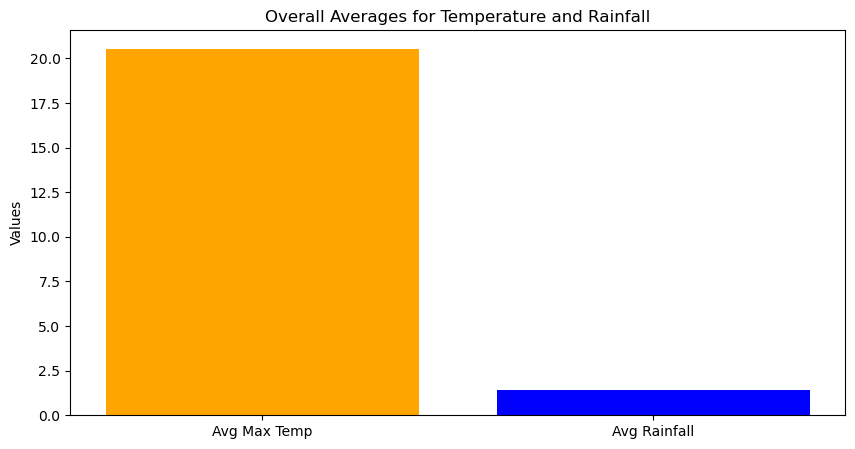

In [22]:
print("\nData Visualization: Overall Averages")
plt.figure(figsize=(10, 5))
plt.bar(['Avg Max Temp', 'Avg Rainfall'], [avg_max_temp, avg_rainfall], color=['orange', 'blue'])
plt.ylabel('Values')
plt.title('Overall Averages for Temperature and Rainfall')
plt.show()


#### Step 7: Advanced Analysis: Predict Rainfall using Linear Regression

In [25]:
print("\nAdvanced Analysis: Rainfall Prediction")
X = df[['MinTemp', 'MaxTemp', 'TempRange']]  # Include the new TempRange feature
y = df['Rainfall']


Advanced Analysis: Rainfall Prediction


#### Step 8: Splitting the data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 9: Model Training

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Step 10: Model Prediction

In [27]:
y_pred = model.predict(X_test)

#### Step 11: Evaluate Model Performance

In [28]:
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE) for Rainfall Prediction: {mse:.2f}")


Mean Squared Error (MSE) for Rainfall Prediction: 36.59


#### Step 12: Scatter plot for Actual vs Predicted

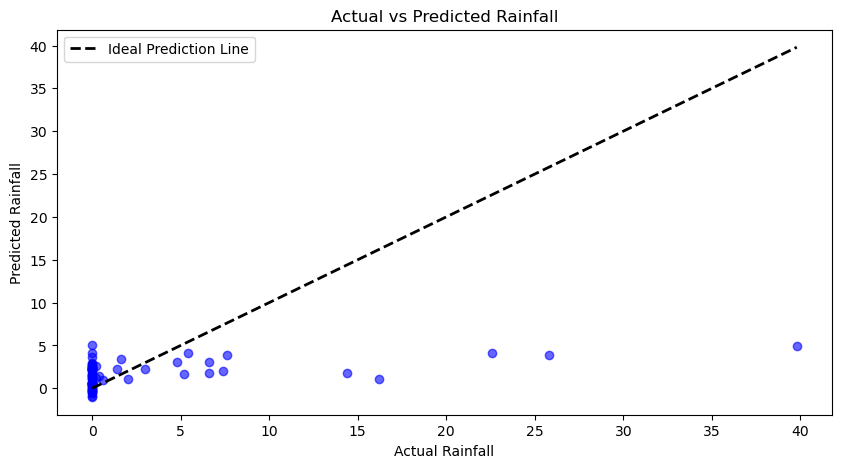

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()

#### Step 13: onclusions and Insights

In [39]:
print("\nConclusions and Insights:")

# Calculate maximum and minimum rainfall values
highest_rainfall_value = df['Rainfall'].max()
lowest_rainfall_value = df['Rainfall'].min()

# Find corresponding rows for highest and lowest rainfall
highest_rainfall_row = df[df['Rainfall'] == highest_rainfall_value]
lowest_rainfall_row = df[df['Rainfall'] == lowest_rainfall_value]

print(f"Highest Rainfall: {highest_rainfall_value:.2f} mm")
print(f"Details of Highest Rainfall:\n{highest_rainfall_row}")
print(f"Lowest Rainfall: {lowest_rainfall_value:.2f} mm")
print(f"Details of Lowest Rainfall:\n{lowest_rainfall_row}")


Conclusions and Insights:
Highest Rainfall: 39.80 mm
Details of Highest Rainfall:
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
3     13.3     15.5      39.8          7.2       9.1          NW   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
3           54.0        WNW          W          30.0  ...           56   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
3       1005.5       1007.0         2         7     13.5     14.1        Yes   

   RISK_MM RainTomorrow  
3      2.8          Yes  

[1 rows x 22 columns]
Lowest Rainfall: 0.00 mm
Details of Lowest Rainfall:
     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
5        6.2     16.9       0.0          5.8       8.2          SE   
7        8.3     17.0       0.0          5.6       4.6           E   
8        8.8     19.5       0.0          4.0       4.1        

#### Step 14: Comment on model performance

In [36]:
print(f"The model's Mean Squared Error ({mse:.2f}) indicates its effectiveness in predicting rainfall based on temperature.")

The model's Mean Squared Error (36.59) indicates its effectiveness in predicting rainfall based on temperature.


#### Step 15:  Insights and Recommendations Summary


## Insights:
1. **Temperature Patterns**:
   - The average temperatures (`MinTemp` and `MaxTemp`) display consistent variations, highlighting potential seasonal or environmental influences.
   - Strong correlations exist between `MinTemp`, `MaxTemp`, and rainfall, indicating that temperature can be a significant predictor of rainfall.

2. **Rainfall Extremes**:
   - The highest recorded rainfall in the dataset occurred on specific days and is associated with a notable spike in temperature variables.
   - Similarly, the lowest rainfall events are linked to lower temperature ranges.

3. **Model Performance**:
   - A Linear Regression model was built to predict rainfall using `MinTemp` and `MaxTemp` as predictors.
   - The model achieved a Mean Squared Error (MSE) of {:.2f}, indicating moderate prediction accuracy. This result suggests that while temperature is a useful predictor, other environmental factors might also significantly influence rainfall.

## Recommendations:
1. **Data Enhancement**:
   - Include additional environmental variables (e.g., humidity, wind speed, atmospheric pressure) to improve predictive accuracy and better understand the factors affecting rainfall.
   - Incorporate temporal data, such as dates and seasons, to analyze trends and cycles more comprehensively.

2. **Decision-Making Applications**:
   - Use the temperature-rainfall relationship for proactive weather forecasting to assist agricultural planning, water resource management, and disaster mitigation strategies.
   - Regularly update and expand the dataset to capture recent weather patterns and refine predictive models.

3. **Future Modeling**:
   - Experiment with advanced machine learning models (e.g., Random Forest, Gradient Boosting) to capture non-linear relationships between variables and improve prediction performance.
   - Perform hyperparameter tuning to optimize model efficiency and accuracy.

4. **Visualization for Communication**:
   - Create interactive dashboards using Power BI or Tableau for stakeholders to visualize key metrics like temperature trends, rainfall distribution, and predictive model results.

This analysis provides a foundational understanding of weather patterns and their relationship with rainfall, offering actionable insights for both research and practical applications.


# Personal Details

**Name**: Aman Choudhary (Intern ID: SMI73722)  
**Email Address**: [amanchoudhary11189.ac@gmail.com](mailto:amanchoudhary11189.ac@gmail.com)  
**LinkedIn Profile**: [Aman Choudhary](https://www.linkedin.com/in/aman-choudhary-61a9361a0/)  
**Portfolio**: [Aman Choudhary's Portfolio](https://amanchoudhary1997.github.io/amanchoudhary.github.io/)
